In [66]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [67]:


df = pd.read_csv('dados_treino_alunos.csv')
print(df.head())

    Nome_UF           Nome_Município                Tipo_de_VE  Qtd. Veículos  \
0  RONDONIA    ALTA FLORESTA D'OESTE  GASOLINA/ALCOOL/ELETRICO              3   
1  RONDONIA    ALTA FLORESTA D'OESTE         GASOLINA/ELETRICO              1   
2  RONDONIA    ALTA FLORESTA D'OESTE           HIBRIDO PLUG-IN              1   
3  RONDONIA  ALTO ALEGRE DOS PARECIS  GASOLINA/ALCOOL/ELETRICO              1   
4  RONDONIA             ALTO PARAISO    ELETRICO/FONTE EXTERNA              1   

   Cod_municipio   Ano  Potencia_instalada_fotovoltaica  Tarifa_eletrica  \
0        1100015  2024                          3467.06       686.555813   
1        1100015  2024                          3467.06       686.555813   
2        1100015  2024                          3467.06       686.555813   
3        1100379  2024                          1281.94       686.555813   
4        1100403  2024                          3030.30       686.555813   

   Densidade_demo    Frota  ...  IDH_renda  Educacao_sup

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12006 entries, 0 to 12005
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Nome_UF                          12006 non-null  object 
 1   Nome_Município                   12006 non-null  object 
 2   Tipo_de_VE                       12006 non-null  object 
 3   Qtd. Veículos                    12006 non-null  int64  
 4   Cod_municipio                    12006 non-null  int64  
 5   Ano                              12006 non-null  int64  
 6   Potencia_instalada_fotovoltaica  12006 non-null  float64
 7   Tarifa_eletrica                  12006 non-null  float64
 8   Densidade_demo                   12006 non-null  float64
 9   Frota                            12006 non-null  float64
 10  Num_medio_salariosMin            12006 non-null  float64
 11  Num_empregados                   12006 non-null  int64  
 12  Num_empresas      

In [69]:
df = df.groupby(['Cod_municipio'], as_index=False, sort=False).agg({
    'Nome_UF':'first',
    'Nome_Município': 'first',
    'Qtd. Veículos': 'sum',
    'Potencia_instalada_fotovoltaica': 'first',
    'Tarifa_eletrica': 'first',
    'Densidade_demo': 'first',
    'Frota': 'first',
    'Num_medio_salariosMin': 'first',
    'Num_empregados': 'first',
    'Num_empresas': 'first',
    'PIB': 'first',
    'Populacao': 'first',
    'Area': 'first',
    'IDH_educacao': 'first',
    'IDH_saude': 'first',
    'IDH_renda': 'first',
    'Educacao_superior': 'first',
    'Irradiancia': 'first',
    'Num_familias': 'first',
    'Verticalizacao_cidades': 'first',
    'Familias_area_rural': 'first',
    'Casas_proprias': 'first',
    'Casas_alugadas': 'first',
    'Residentes_por_familia': 'first',
    'Familias_mais_3_salarios': 'first'
})


In [70]:
df = df.rename(columns={'Qtd. Veículos': 'Veiculos_Eletricos'})


In [71]:
df.head()

,Cod_municipio,Nome_UF,Nome_Município,Veiculos_Eletricos,Potencia_instalada_fotovoltaica,Tarifa_eletrica,Densidade_demo,Frota,Num_medio_salariosMin,Num_empregados,...,IDH_renda,Educacao_superior,Irradiancia,Num_familias,Verticalizacao_cidades,Familias_area_rural,Casas_proprias,Casas_alugadas,Residentes_por_familia,Familias_mais_3_salarios
0,1100015,RONDONIA,ALTA FLORESTA D'OESTE,5,3467.06,686.555813,3.04,16100.0,2.1,3706,...,0.657,0.036,4635.0,7695.0,0.001689,0.375049,0.697076,0.106823,2.79,0.030669
1,1100379,RONDONIA,ALTO ALEGRE DOS PARECIS,1,1281.94,686.555813,2.90,5868.0,2.0,1297,...,0.603,0.017,4624.0,4036.0,0.000496,0.548315,0.713330,0.073588,2.84,0.018335
2,1100403,RONDONIA,ALTO PARAISO,3,3030.30,686.555813,6.15,9212.0,2.2,1964,...,0.664,0.013,4933.0,5762.0,0.018570,0.482818,0.634328,0.098403,2.83,0.026033
3,1100346,RONDONIA,ALVORADA D'OESTE,2,3024.26,686.555813,4.33,9131.0,1.7,1762,...,0.654,0.040,4625.0,4814.0,0.007478,0.401122,0.817408,0.086622,2.72,0.034275
4,1100023,RONDONIA,ARIQUEMES,131,28751.08,686.555813,21.88,82721.0,2.0,24810,...,0.716,0.039,4494.0,34768.0,0.062069,0.126754,0.515905,0.182984,2.77,0.053325


In [72]:
df['PIB'] = pd.to_numeric(df['PIB'], errors='coerce')
df[df['PIB'].isna()]

,Cod_municipio,Nome_UF,Nome_Município,Veiculos_Eletricos,Potencia_instalada_fotovoltaica,Tarifa_eletrica,Densidade_demo,Frota,Num_medio_salariosMin,Num_empregados,...,IDH_renda,Educacao_superior,Irradiancia,Num_familias,Verticalizacao_cidades,Familias_area_rural,Casas_proprias,Casas_alugadas,Residentes_por_familia,Familias_mais_3_salarios
3589,5003900,MATO GROSSO DO SUL,FIGUEIRAO,4,806.02,873.322404,0.73,1456.0,2.6,655,...,0.677,0.036,5233.0,1363.0,0.000734,0.428467,0.41526,0.082172,2.59,0.029347


In [73]:
# de acordo com a tabela PIB do IBGE, o PIB do municipio de figueirao é 143407000.00
df.loc[df['Cod_municipio'] == 5003900, 'PIB'] = 143407000.00



In [74]:
# Verificando o PIB do municipio de Figueirão apos a correção
df.loc[df['Cod_municipio'] == 5003900, 'PIB']


3589    143407000.0
Name: PIB, dtype: float64

In [75]:
# #transforma a colna nome UF em one hot encoding
# df = pd.get_dummies(df, columns=['Nome_UF'], prefix='UF', drop_first=True)


In [76]:
encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
encoded_array = encoder.fit_transform(df[['Nome_UF']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Nome_UF']))
encoded_df.index = df.index
df = pd.concat([df, encoded_df], axis=1)
df = df.drop('Nome_UF', axis=1)


In [77]:
print(df.columns)


Index(['Cod_municipio', 'Nome_Município', 'Veiculos_Eletricos',
       'Potencia_instalada_fotovoltaica', 'Tarifa_eletrica', 'Densidade_demo',
       'Frota', 'Num_medio_salariosMin', 'Num_empregados', 'Num_empresas',
       'PIB', 'Populacao', 'Area', 'IDH_educacao', 'IDH_saude', 'IDH_renda',
       'Educacao_superior', 'Irradiancia', 'Num_familias',
       'Verticalizacao_cidades', 'Familias_area_rural', 'Casas_proprias',
       'Casas_alugadas', 'Residentes_por_familia', 'Familias_mais_3_salarios',
       'Nome_UF_ACRE', 'Nome_UF_ALAGOAS', 'Nome_UF_AMAPA', 'Nome_UF_AMAZONAS',
       'Nome_UF_BAHIA', 'Nome_UF_CEARA', 'Nome_UF_DISTRITO FEDERAL',
       'Nome_UF_ESPIRITO SANTO', 'Nome_UF_GOIAS', 'Nome_UF_MARANHAO',
       'Nome_UF_MATO GROSSO', 'Nome_UF_MATO GROSSO DO SUL',
       'Nome_UF_MINAS GERAIS', 'Nome_UF_PARA', 'Nome_UF_PARAIBA',
       'Nome_UF_PARANA', 'Nome_UF_PERNAMBUCO', 'Nome_UF_PIAUI',
       'Nome_UF_RIO DE JANEIRO', 'Nome_UF_RIO GRANDE DO NORTE',
       'Nome_UF_RIO G

In [78]:
df['Irradiancia_x_Potencia'] = df['Irradiancia'] * df['Potencia_instalada_fotovoltaica']
df['PIB'] = pd.to_numeric(df['PIB'], errors='coerce')
df['IDH'] = (df['IDH_renda'] * df['IDH_educacao'] * df['IDH_saude'])** (1/3)
df['indice_complexidade_urbana'] = ( df['Num_empresas'] + df['Frota'] + df['Verticalizacao_cidades'] * 1000)
df['massa_salarial_aproximada'] = df['Num_empregados'] * df['Num_medio_salariosMin']
df['razao_veiculos_eletricos'] = df['Veiculos_Eletricos'] / df['Frota']

In [79]:
# Salvar informações de identificação
municipios_info = df[['Cod_municipio', 'Nome_Município']].copy()
# remove as colunas do df principal
df = df.drop(['Cod_municipio', 'Nome_Município'], axis=1)


In [80]:
print(df.columns)

Index(['Veiculos_Eletricos', 'Potencia_instalada_fotovoltaica',
       'Tarifa_eletrica', 'Densidade_demo', 'Frota', 'Num_medio_salariosMin',
       'Num_empregados', 'Num_empresas', 'PIB', 'Populacao', 'Area',
       'IDH_educacao', 'IDH_saude', 'IDH_renda', 'Educacao_superior',
       'Irradiancia', 'Num_familias', 'Verticalizacao_cidades',
       'Familias_area_rural', 'Casas_proprias', 'Casas_alugadas',
       'Residentes_por_familia', 'Familias_mais_3_salarios', 'Nome_UF_ACRE',
       'Nome_UF_ALAGOAS', 'Nome_UF_AMAPA', 'Nome_UF_AMAZONAS', 'Nome_UF_BAHIA',
       'Nome_UF_CEARA', 'Nome_UF_DISTRITO FEDERAL', 'Nome_UF_ESPIRITO SANTO',
       'Nome_UF_GOIAS', 'Nome_UF_MARANHAO', 'Nome_UF_MATO GROSSO',
       'Nome_UF_MATO GROSSO DO SUL', 'Nome_UF_MINAS GERAIS', 'Nome_UF_PARA',
       'Nome_UF_PARAIBA', 'Nome_UF_PARANA', 'Nome_UF_PERNAMBUCO',
       'Nome_UF_PIAUI', 'Nome_UF_RIO DE JANEIRO',
       'Nome_UF_RIO GRANDE DO NORTE', 'Nome_UF_RIO GRANDE DO SUL',
       'Nome_UF_RONDONIA', 

In [81]:
# X = df.drop('Veiculos_Eletricos', axis=1)
# y = df['Veiculos_Eletricos']
X = df[['Num_empregados', 'Frota', 'Populacao', 'Irradiancia_x_Potencia', 'IDH', 'Familias_mais_3_salarios', 'Densidade_demo']]
y = df['Veiculos_Eletricos']

X_train, X_test, y_train, y_test, municipios_train, municipios_test = train_test_split(
    X, y, municipios_info, test_size=0.2, random_state=42
)


In [82]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

y_pred_lr = modelo_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"R²: {r2_lr:.4f}")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")



R²: 0.9194
MAE: 73.20
RMSE: 773.86


In [83]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R²: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")


R²: 0.4335
MAE: 107.34
RMSE: 2051.62


In [84]:
from sklearn.neighbors import KNeighborsRegressor
modelo_knn = KNeighborsRegressor(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

y_pred_knn = modelo_knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Avaliação do modelo K-Nearest Neighbors:")
print(f"R²: {r2_knn:.4f}")
print(f"MAE: {mae_knn:.2f}")
print(f"RMSE: {rmse_knn:.2f}")


Avaliação do modelo K-Nearest Neighbors:
R²: 0.1085
MAE: 176.26
RMSE: 2573.75


In [85]:
from sklearn.tree import DecisionTreeRegressor

modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(X_train, y_train)

y_pred_tree = modelo_tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Avaliação do modelo Decision Tree Regressor:")
print(f"R²: {r2_tree:.4f}")
print(f"MAE: {mae_tree:.2f}")
print(f"RMSE: {rmse_tree:.2f}")


Avaliação do modelo Decision Tree Regressor:
R²: 0.4996
MAE: 110.48
RMSE: 1928.30


In [86]:
from sklearn.ensemble import GradientBoostingRegressor

modelo_gb = GradientBoostingRegressor(random_state=42)
modelo_gb.fit(X_train, y_train)

y_pred_gb = modelo_gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"R²: {r2_gb:.4f}")
print(f"MAE: {mae_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")


R²: 0.4727
MAE: 105.88
RMSE: 1979.42


In [87]:
from xgboost import XGBRegressor

modelo_xg = XGBRegressor()
modelo_xg.fit(X_train, y_train)

y_pred_xg = modelo_xg.predict(X_test)

mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mse_xg)
mae_xg = mean_absolute_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print(f"R²: {r2_xg:.4f}")
print(f"MAE: {mae_xg:.2f}")
print(f"RMSE: {rmse_xg:.2f}")

R²: 0.4612
MAE: 111.26
RMSE: 2000.99


In [88]:
import tensorflow as tf

print("Versão do TensorFlow:", tf.__version__)
print("Dispositivos disponíveis:")
print(tf.config.list_physical_devices('GPU'))


Versão do TensorFlow: 2.19.0
Dispositivos disponíveis:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Epoch 1/500


/home/dede/data_analisys/jupyter-env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 649258.2500 - mae: 97.9838 - val_loss: 509321.1875 - val_mae: 87.1530
Epoch 2/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 429110.2188 - mae: 94.8847 - val_loss: 502789.7188 - val_mae: 85.2444
Epoch 3/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 745323.1250 - mae: 97.5735 - val_loss: 489852.9062 - val_mae: 83.2733
Epoch 4/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 694318.7500 - mae: 103.7094 - val_loss: 460904.7500 - val_mae: 81.7305
Epoch 5/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 272225.2812 - mae: 80.9578 - val_loss: 421646.5312 - val_mae: 82.8960
Epoch 6/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 317970.2812 - mae: 83.8978 - val_loss: 373778.1250 - val_mae: 86.8153
Epoch 7/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 110497.3203 - mae: 70.5378 - val_loss: 337411.7188 - val_mae: 91.1545
Epoch 8/500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 278692.0625 - mae: 92.9515 - val_loss: 283921.37

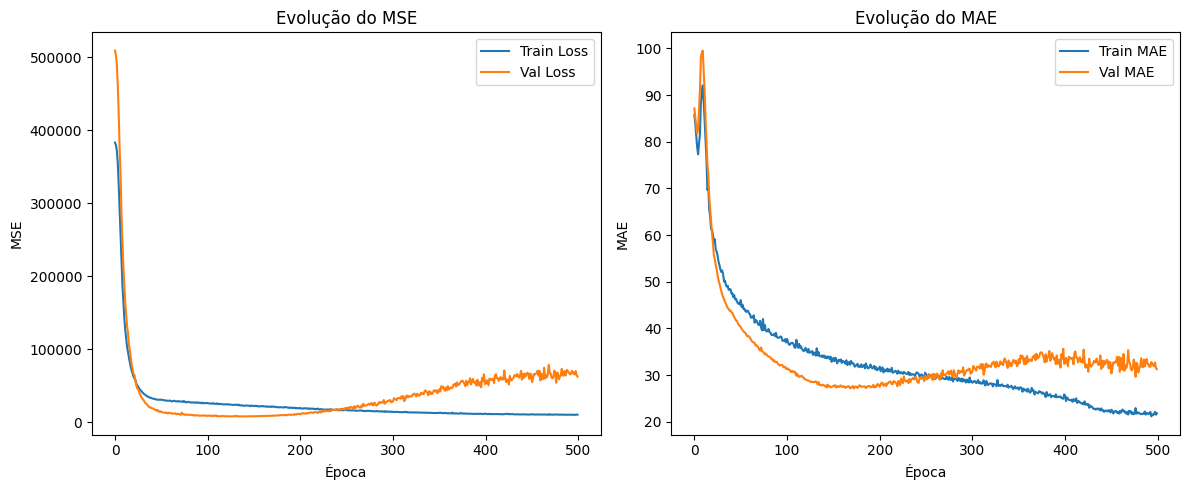

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Métricas de Desempenho:
RMSE: 647.9753
MAE: 47.1123
R²: 0.9435


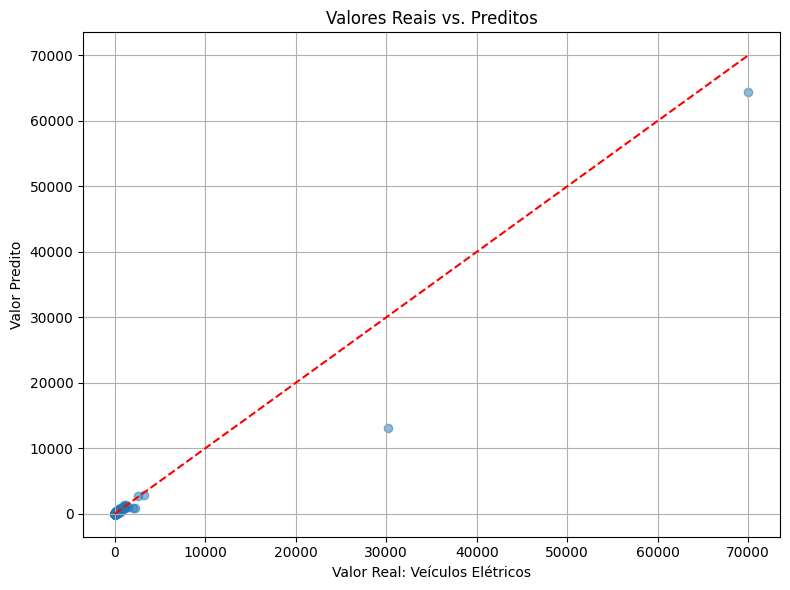

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(160, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Regressão → saída escalar
])

optimizer = keras.optimizers.Adam(learning_rate=0.000642144054857491)

model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    # callbacks=[early_stop],
    verbose=1
)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Evolução do MSE')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Evolução do MAE')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

y_pred = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMétricas de Desempenho:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Valores Reais vs. Preditos')
plt.xlabel('Valor Real: Veículos Elétricos')
plt.ylabel('Valor Predito')
plt.grid(True)
plt.tight_layout()
plt.show()

In [91]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Escalando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Função que cria modelos com hiperparâmetros variáveis
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))

    # Número de camadas ocultas: 1 a 3
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))

    model.add(layers.Dense(1))  # camada de saída para regressão

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss='mse',
        metrics=['mae']
    )
    return model

# Tuner para busca
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=20,
    executions_per_trial=1,
    directory='tuning_logs',
    project_name='regressao_veiculos_eletricos'
)

# Early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Inicia busca
tuner.search(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=200,
    callbacks=[early_stop],
    verbose=1
)

# Melhor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Avaliação no conjunto de teste
loss, mae = best_model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"\nMelhor modelo: MAE no teste = {mae:.2f}")


Trial 20 Complete [00h 00m 15s]
val_mae: 21.48469352722168

Best val_mae So Far: 21.081743240356445
Total elapsed time: 00h 10m 01s


/home/dede/data_analisys/jupyter-env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 905180.9375 - mae: 63.8326

Melhor modelo: MAE no teste = 71.12


In [92]:
tuner.results_summary()


Results summary
Results in tuning_logs/regressao_veiculos_eletricos
Showing 10 best trials
Objective(name="val_mae", direction="min")

Trial 18 summary
Hyperparameters:
num_layers: 2
units_0: 160
activation: relu
learning_rate: 0.000642144054857491
units_1: 32
units_2: 64
Score: 21.081743240356445

Trial 19 summary
Hyperparameters:
num_layers: 2
units_0: 224
activation: relu
learning_rate: 0.001263698656945194
units_1: 224
units_2: 128
Score: 21.48469352722168

Trial 00 summary
Hyperparameters:
num_layers: 3
units_0: 224
activation: relu
learning_rate: 0.0012872737477703168
units_1: 32
units_2: 32
Score: 21.826595306396484

Trial 06 summary
Hyperparameters:
num_layers: 3
units_0: 192
activation: relu
learning_rate: 0.00011722752170657343
units_1: 256
units_2: 224
Score: 22.489295959472656

Trial 01 summary
Hyperparameters:
num_layers: 3
units_0: 64
activation: relu
learning_rate: 0.0002533484174818943
units_1: 32
units_2: 64
Score: 23.560808181762695

Trial 08 summary
Hyperparameters:
